# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies
import numpy as np
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
from citipy import citipy
import requests
from config import api_key

## Generate Cities List

In [5]:
lat_data = np.random.uniform(-90, 90, size = 1500)
lng_data = np.random.uniform(-180, 180, size = 1500)

city_list = []

for x in range (0, 1500):
    city = citipy.nearest_city(lat_data[x], lng_data[x])
    city_list.append(city.city_name)
    
city_list = list(set(city_list))

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Create DataFrame with cities list and empty column values
df = pd.DataFrame({"City": city_list,
                 "Lat": "",
                  "Lng": "",
                  "Max Temp": "",
                  "Humidity": "",
                  "Cloudiness": "",
                  "Wind Speed": "",
                  "Country": "",
                  "Date": ""})

# Fill other column values
for index, row in df.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    
    City = row["City"]
    
    params = {"q": City,
          "units": "metric",
         "appid": api_key}
    
    try:
        weather = (requests.get(url, params = params)).json()
        
        df.loc[index, "Lat"] = weather["coord"]["lat"]
        df.loc[index, "Lng"] = weather["coord"]["lon"]
        df.loc[index, "Max Temp"] = weather["main"]["temp_max"]
        df.loc[index, "Humidity"] = weather["main"]["humidity"]
        df.loc[index, "Cloudiness"] = weather["clouds"]["all"]
        df.loc[index, "Wind Speed"] = weather["wind"]["speed"]
        df.loc[index, "Country"] = weather["sys"]["country"]
        df.loc[index, "Date"] = weather["dt"]
        
        print("Retrieving data for city number " + str((index + 1)) + ". " + weather["name"])
        
    except (KeyError, IndexError):
        pass

Retrieving data for city number 1. Tiksi
Retrieving data for city number 2. Tosya
Retrieving data for city number 3. Adré
Retrieving data for city number 4. Saint Paul Harbor
Retrieving data for city number 5. Sault Ste. Marie
Retrieving data for city number 6. Broome
Retrieving data for city number 7. Guarujá
Retrieving data for city number 9. Ostrovnoy
Retrieving data for city number 10. Port Alberni
Retrieving data for city number 11. Yerköy
Retrieving data for city number 12. Anloga
Retrieving data for city number 13. Caravelas
Retrieving data for city number 15. Grindavik
Retrieving data for city number 16. Lorengau
Retrieving data for city number 17. Albox
Retrieving data for city number 18. Chantada
Retrieving data for city number 19. Río Gallegos
Retrieving data for city number 20. Pangkalanbuun
Retrieving data for city number 21. Paamiut
Retrieving data for city number 22. Talavera de la Reina
Retrieving data for city number 24. Mahébourg
Retrieving data for city number 25. Nh

Retrieving data for city number 197. Los Palmitos
Retrieving data for city number 198. Phalaborwa
Retrieving data for city number 199. Bay Roberts
Retrieving data for city number 200. Oberstdorf
Retrieving data for city number 201. Rawson
Retrieving data for city number 202. Valdivia
Retrieving data for city number 203. Geraldton
Retrieving data for city number 204. Verkhnyaya Inta
Retrieving data for city number 206. Husavik
Retrieving data for city number 207. Tommot
Retrieving data for city number 208. Korla
Retrieving data for city number 209. Brejo
Retrieving data for city number 210. Ibrā’
Retrieving data for city number 211. Atlantic City
Retrieving data for city number 212. Dingle
Retrieving data for city number 213. Labuhan
Retrieving data for city number 215. Christchurch
Retrieving data for city number 216. Touros
Retrieving data for city number 217. Karratha
Retrieving data for city number 218. Waiouru
Retrieving data for city number 219. Litovko
Retrieving data for city nu

Retrieving data for city number 388. Manta
Retrieving data for city number 389. Codrington
Retrieving data for city number 390. Manicoré
Retrieving data for city number 391. Lebu
Retrieving data for city number 392. Den Helder
Retrieving data for city number 393. Mauá
Retrieving data for city number 394. Hastings
Retrieving data for city number 395. Lima
Retrieving data for city number 396. Salisbury
Retrieving data for city number 397. Vanimo
Retrieving data for city number 398. Kloulklubed
Retrieving data for city number 399. Bluff
Retrieving data for city number 400. Larsnes
Retrieving data for city number 401. Butaritari
Retrieving data for city number 402. Prado
Retrieving data for city number 404. Lincoln
Retrieving data for city number 405. Clyde River
Retrieving data for city number 406. Agirish
Retrieving data for city number 407. Quryq
Retrieving data for city number 408. Tabas
Retrieving data for city number 409. Parkland
Retrieving data for city number 410. Cayenne
Retrievi

Retrieving data for city number 579. Turukhansk
Retrieving data for city number 580. Port-Cartier
Retrieving data for city number 581. Si Sa Ket
Retrieving data for city number 582. Nyurba
Retrieving data for city number 583. Volkach
Retrieving data for city number 584. North Platte
Retrieving data for city number 585. Kudahuvadhoo
Retrieving data for city number 586. Codigoro
Retrieving data for city number 587. Kambove
Retrieving data for city number 588. Talnakh
Retrieving data for city number 589. Verāval
Retrieving data for city number 590. Punta Arenas
Retrieving data for city number 591. Arraial do Cabo
Retrieving data for city number 592. Morón
Retrieving data for city number 593. Nikolskoye
Retrieving data for city number 594. Krasnosel'kup
Retrieving data for city number 595. Xining
Retrieving data for city number 596. Avera
Retrieving data for city number 597. Yazman
Retrieving data for city number 598. Ushuaia
Retrieving data for city number 599. Cottbus
Retrieving data for

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df.to_csv("Global_weather.csv")

In [8]:
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.869,-37.02,84,68,1.64,RU,1610598922
1,tosya,41.0155,34.0401,3.23,82,100,1.37,TR,1610598922
2,adre,13.4667,22.2,16.47,30,0,6.83,TD,1610598922
3,kodiak,57.79,-152.407,-1,86,1,3.57,US,1610598923
4,sault sainte marie,46.5168,-84.3333,0,93,90,2.06,CA,1610598637


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Remove cities not found in weather api
clean_city_data = df[df["Lat"] != ""].reset_index()

clean_city_data.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,tiksi,71.6872,128.869,-37.02,84,68,1.64,RU,1610598922
1,1,tosya,41.0155,34.0401,3.23,82,100,1.37,TR,1610598922
2,2,adre,13.4667,22.2,16.47,30,0,6.83,TD,1610598922
3,3,kodiak,57.79,-152.407,-1,86,1,3.57,US,1610598923
4,4,sault sainte marie,46.5168,-84.3333,0,93,90,2.06,CA,1610598637


In [10]:
#  Remove cities with humidity > 100%
clean_city_data = clean_city_data[clean_city_data["Humidity"] < 101].reset_index()
clean_city_data.head()

,level_0,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,tiksi,71.6872,128.869,-37.02,84,68,1.64,RU,1610598922
1,1,1,tosya,41.0155,34.0401,3.23,82,100,1.37,TR,1610598922
2,2,2,adre,13.4667,22.2,16.47,30,0,6.83,TD,1610598922
3,3,3,kodiak,57.79,-152.407,-1,86,1,3.57,US,1610598923
4,4,4,sault sainte marie,46.5168,-84.3333,0,93,90,2.06,CA,1610598637


In [11]:
# Removing columns created by resetting index
clean_city_data.drop(["level_0", "index"], axis = 1, inplace = True)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.869,-37.02,84,68,1.64,RU,1610598922
1,tosya,41.0155,34.0401,3.23,82,100,1.37,TR,1610598922
2,adre,13.4667,22.2,16.47,30,0,6.83,TD,1610598922
3,kodiak,57.79,-152.407,-1,86,1,3.57,US,1610598923
4,sault sainte marie,46.5168,-84.3333,0,93,90,2.06,CA,1610598637


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This graph displays the change in temperature at different latitudes as measured in a random selection of cities across the world. The data indicates that the temperature is heighest at approximately -20° latitude and grows colder at higher and lower latitudes although a lack of cities at the extremely low latitudes makes this cooling hard to view in the figure.


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


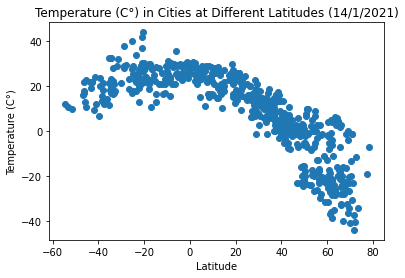

In [58]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"])
plt.xlabel("Latitude")
plt.axes().set_ylabel("Temperature (C°)")
plt.title("Temperature (C°) in Cities at Different Latitudes (14/1/2021)")

plt.savefig("Lat_vs_temp.png")

print("This graph displays the change in temperature at different latitudes as measured in a random selection of cities across the world. The data indicates that the temperature is heighest at approximately -20° latitude and grows colder at higher and lower latitudes although a lack of cities at the extremely low latitudes makes this cooling hard to view in the figure.")

## Latitude vs. Humidity Plot

This graph displays the change in humidity at different latitudes as measured in a random selection of cities across the world. There is no discerable correlation between humidity and latitude in the figure.
None


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


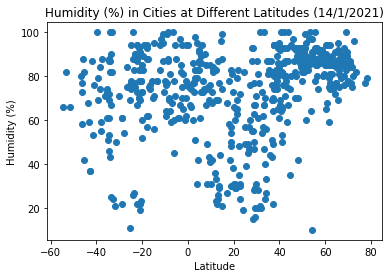

In [59]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"])
plt.xlabel("Latitude")
plt.axes().set_ylabel("Humidity (%)")
plt.title("Humidity (%) in Cities at Different Latitudes (14/1/2021)")

plt.savefig("Lat_vs_hum.png")

print(print("This graph displays the change in humidity at different latitudes as measured in a random selection of cities across the world. There is no discerable correlation between humidity and latitude in the figure."))

## Latitude vs. Cloudiness Plot

This graph displays the change in cloudiness at different latitudes as measured in a random selection of cities across the world. There is no discerable correlation between cloudiness and latitude in the figure.


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


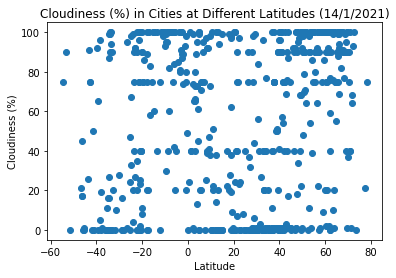

In [60]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"])
plt.xlabel("Latitude")
plt.axes().set_ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) in Cities at Different Latitudes (14/1/2021)")

plt.savefig("Lat_vs_cloud.png")

print("This graph displays the change in cloudiness at different latitudes as measured in a random selection of cities across the world. There is no discerable correlation between cloudiness and latitude in the figure.")

## Latitude vs. Wind Speed Plot

This graph displays the change in wing speed at different latitudes as measured in a random selection of cities across the world. There is no discerable correlation between wind speed and latitude in the figure.


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


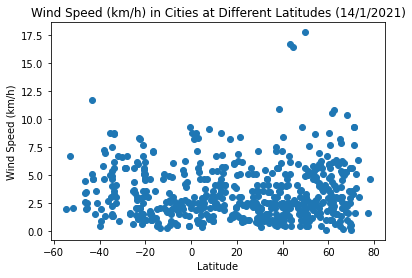

In [61]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"])
plt.xlabel("Latitude")
plt.axes().set_ylabel("Wind Speed (km/h)")
plt.title("Wind Speed (km/h) in Cities at Different Latitudes (14/1/2021)")

plt.savefig("Lat_vs_wind.png")

print("This graph displays the change in wing speed at different latitudes as measured in a random selection of cities across the world. There is no discerable correlation between wind speed and latitude in the figure.")

## Linear Regression

In [62]:
southern_data = clean_city_data[clean_city_data["Lat"] < 0]
northern_data = clean_city_data[clean_city_data["Lat"] >= 0]

Latitude_n = list(northern_data["Lat"])
Temp_n = list(northern_data["Max Temp"])
Humidity_n = list(northern_data["Humidity"])
Cloudiness_n = list(northern_data["Cloudiness"])
Wind_n = list(northern_data["Wind Speed"])

Latitude_s = list(southern_data["Lat"])
Temp_s = list(southern_data["Max Temp"])
Humidity_s = list(southern_data["Humidity"])
Cloudiness_s = list(southern_data["Cloudiness"])
Wind_s = list(southern_data["Wind Speed"])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.75 this indicates a strong negative correlation between latitude and temperature in the northern hemisphere (i.e. it gets colder the further north of the equator you travel).


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


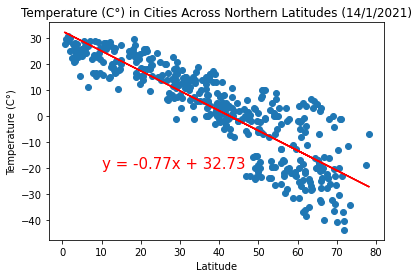

In [63]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Latitude_n, Temp_n)
regress_values = pd.Series(Latitude_n) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_n, regress_values, color = "r")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.scatter(Latitude_n, northern_data["Max Temp"])
plt.xlabel("Latitude")
plt.axes().set_ylabel("Temperature (C°)")
plt.title("Temperature (C°) in Cities Across Northern Latitudes (14/1/2021)")

plt.savefig("Latn_vs_temp.png")

print(f"The r-squared value is {round(rvalue**2, 2)} this indicates a strong negative correlation between latitude and temperature in the northern hemisphere (i.e. it gets colder the further north of the equator you travel).")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.22 this indicates that there is a weak positive correlation between latitude and temperature in the southern hemisphere. The discrepancy between this and the results seen in the northern hemisphere may be due to the fact that not many cities exist in the far southern areas of the earth meaning that this end of the data was left unrepresented.


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


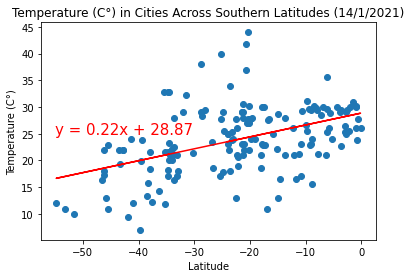

In [64]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Latitude_s, Temp_s)
regress_values = pd.Series(Latitude_s) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_s, regress_values, color = "r")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.scatter(southern_data["Lat"], southern_data["Max Temp"])
plt.xlabel("Latitude")
plt.axes().set_ylabel("Temperature (C°)")
plt.title("Temperature (C°) in Cities Across Southern Latitudes (14/1/2021)")

plt.savefig("Lats_vs_temp.png")

print(f"The r-squared value is {round(rvalue**2, 2)} this indicates that there is a weak positive correlation between latitude and temperature in the southern hemisphere. The discrepancy between this and the results seen in the northern hemisphere may be due to the fact that not many cities exist in the far southern areas of the earth meaning that this end of the data was left unrepresented.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.17 this indicates a weak positive correlation between humidity and latitude in the northern hemisphere. Given the data it is impossible to suggest that there is a relationship between these two variables.


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


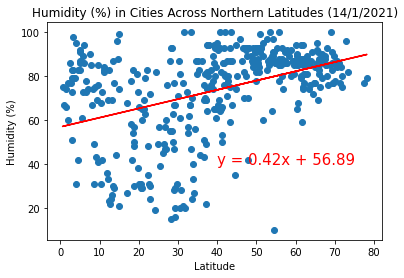

In [65]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Latitude_n, Humidity_n)
regress_values = pd.Series(Latitude_n) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_n, regress_values, color = "r")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.scatter(northern_data["Lat"], northern_data["Humidity"])
plt.xlabel("Latitude")
plt.axes().set_ylabel("Humidity (%)")
plt.title("Humidity (%) in Cities Across Northern Latitudes (14/1/2021)")

plt.savefig("Latn_vs_hum.png")

print(f"The r-squared value is {round(rvalue**2, 2)} this indicates a weak positive correlation between humidity and latitude in the northern hemisphere. Given the data it is impossible to suggest that there is a relationship between these two variables.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.04 this indicates a very weak positive correlation between humidity and latitude in the southern hemisphere. Given the data it is impossible to suggest that there is a relationship between these two variables.


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


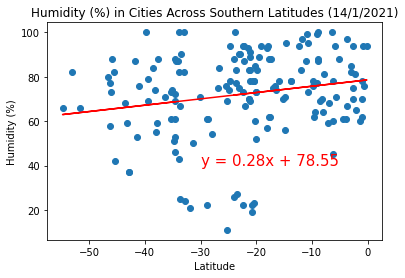

In [66]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Latitude_s, Humidity_s)
regress_values = pd.Series(Latitude_s) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_s, regress_values, color = "r")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.scatter(southern_data["Lat"], southern_data["Humidity"])
plt.xlabel("Latitude")
plt.axes().set_ylabel("Humidity (%)")
plt.title("Humidity (%) in Cities Across Southern Latitudes (14/1/2021)")

plt.savefig("Lats_vs_hum.png")

print(f"The r-squared value is {round(rvalue**2, 2)} this indicates a very weak positive correlation between humidity and latitude in the southern hemisphere. Given the data it is impossible to suggest that there is a relationship between these two variables.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.1 this indicates a very weak positive correlation between cloudiness and latitude in the northern hemisphere. Given the data it is impossible to suggest that there is a relationship between these two variables.


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


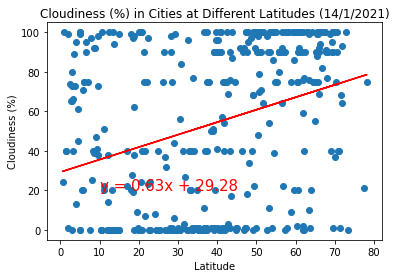

In [67]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Latitude_n, Cloudiness_n)
regress_values = pd.Series(Latitude_n) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_n, regress_values, color = "r")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.scatter(northern_data["Lat"], northern_data["Cloudiness"])
plt.xlabel("Latitude")
plt.axes().set_ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) in Cities at Different Latitudes (14/1/2021)")

plt.savefig("Latn_vs_cloud.png")

print(f"The r-squared value is {round(rvalue**2, 2)} this indicates a very weak positive correlation between cloudiness and latitude in the northern hemisphere. Given the data it is impossible to suggest that there is a relationship between these two variables.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.18 this indicates a weak positive correlation between cloudiness and latitude in the southern hemisphere. Given the data it is impossible to suggest that there is a relationship between these two variables.


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


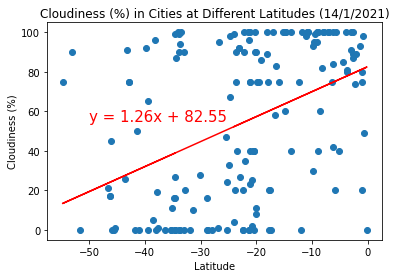

In [69]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Latitude_s, Cloudiness_s)
regress_values = pd.Series(Latitude_s) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_s, regress_values, color = "r")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.scatter(southern_data["Lat"], southern_data["Cloudiness"])
plt.xlabel("Latitude")
plt.axes().set_ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) in Cities at Different Latitudes (14/1/2021)")

plt.savefig("Lats_vs_cloud.png")

print(f"The r-squared value is {round(rvalue**2, 2)} this indicates a weak positive correlation between cloudiness and latitude in the southern hemisphere. Given the data it is impossible to suggest that there is a relationship between these two variables.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.01 this indicates an extremely weak positive correlation between wind speed and latitude in the northern hemisphere. Given the data it is impossible to suggest that there is a relationship between these two variables.


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


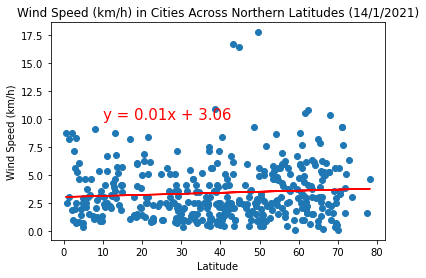

In [71]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Latitude_n, Wind_n)
regress_values = pd.Series(Latitude_n) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_n, regress_values, color = "r")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.scatter(northern_data["Lat"], northern_data["Wind Speed"])
plt.xlabel("Latitude")
plt.axes().set_ylabel("Wind Speed (km/h)")
plt.title("Wind Speed (km/h) in Cities Across Northern Latitudes (14/1/2021)")

plt.savefig("Latn_vs_wind.png")

print(f"The r-squared value is {round(rvalue**2, 2)} this indicates an extremely weak positive correlation between wind speed and latitude in the northern hemisphere. Given the data it is impossible to suggest that there is a relationship between these two variables.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.05 this indicates a very weak negative correlation between wind speed and latitude in the southern hemisphere. Given the data it is impossible to suggest that there is a relationship between these two variables.


C:\Users\Tormentor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


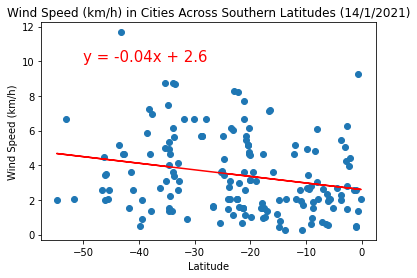

In [72]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Latitude_s, Wind_s)
regress_values = pd.Series(Latitude_s) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude_s, regress_values, color = "r")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.scatter(southern_data["Lat"], southern_data["Wind Speed"])
plt.xlabel("Latitude")
plt.axes().set_ylabel("Wind Speed (km/h)")
plt.title("Wind Speed (km/h) in Cities Across Southern Latitudes (14/1/2021)")

plt.savefig("Lats_vs_wind.png")

print(f"The r-squared value is {round(rvalue**2, 2)} this indicates a very weak negative correlation between wind speed and latitude in the southern hemisphere. Given the data it is impossible to suggest that there is a relationship between these two variables.")

In [76]:
print("Three conclusions reached from the data:")
print("")
print("1. The climate gets cooler the further north of the equator you travel")
print("2. The climate may get cooler the further south of the equator you travel")
print("3. The southern hemisphere is currently warmer than the northern hemisphere; this may be due to the time of year in which the weather data was accessed (14/1/2021). Data displaying yearly average temperature may have been more appropriate for this analysis.")

Three conclusions reached from the data:

1. The climate gets cooler the further north of the equator you travel
2. The climate may get cooler the further south of the equator you travel
3. The southern hemisphere is currently warmer than the northern hemisphere; this may be due to the time of year in which the weather data was accessed (14/1/2021). Data displaying yearly average temperature may have been more appropriate for this analysis.
